#Maria Oros

In this script, as a consequence of 1_explore_data.py, I will explore the data to:
 - Ensure data quality in three key aspects:
    - Handle missing information appropriately.
    - Verify and enforce correct data types.
    - Store the data cleaned (e.g., following a Parquet if possible).
  - Prepare a single, clean dataset to effectively address the questions in Task 2.

------- Instructions from Fetch --------
First: explore the data

Review the unstructured csv files and answer the following questions with code that supports your conclusions:

Are there any data quality issues present?
Are there any fields that are challenging to understand?
We recommend using SQL or python and data visualization to examine the data.


In [342]:
from os import times

import pandas as pd
import numpy as np
from pandas.core.computation.ops import isnumeric
import pandasql as ps

import matplotlib.pyplot as plt
import seaborn as sns
# Maria Oros

In [343]:
!pip install fastparquet


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [344]:
!pip install plotly
import plotly.express as px


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [345]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# Reading the Data 1

In [346]:
# Reading files
products = pd.read_csv('../1_data/raw/PRODUCTS_TAKEHOME.csv', sep=',')
transaction = pd.read_csv('../1_data/raw/TRANSACTION_TAKEHOME.csv', sep=',')
user = pd.read_csv('../1_data/raw/USER_TAKEHOME.csv', sep=',')

# Understanding the data: PRODUCTS

I will explore the data and manage missings accordingly

In [323]:
products #print the data

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


In [324]:
# Data Exploration step 1: Checking for missing values and data stats description
print("----------------------------------- Products")
print("\nProducts: Total ", len(products), " and Count of NaN in each column relative to the dataset total:\n", 100*products.isnull().sum()/len(products),
      "\nDescribe \n", products.describe(),
      "\nData types \n", products.dtypes)


----------------------------------- Products

Products: Total  845552  and Count of NaN in each column relative to the dataset total:
 CATEGORY_1       0.013128
CATEGORY_2       0.168411
CATEGORY_3       7.162895
CATEGORY_4      92.021898
MANUFACTURER    26.784160
BRAND           26.783923
BARCODE          0.476020
dtype: float64 
Describe 
             BARCODE
count  8.415270e+05
mean   6.016109e+11
std    1.022530e+12
min    1.850000e+02
25%    7.124923e+10
50%    6.344185e+11
75%    7.683955e+11
max    6.291108e+13 
Data types 
 CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object


In [325]:
# The number of rows where BARCODE is missing is 4025 out of 845552,
# will be needed to exclude suich rows as BARCODE is a key of this entity
products_clean = products[~products['BARCODE'].isna()]

print(len(products), len(products)-len(products_clean))

845552 4025


From the 1_explore_data.py, certain fields report to have a considerable amount of missing data >26%, which in function of the research questions in task 2 may become relevant to deal with. Now, as the BARCODE is the main variable to work with other datasets, this is the only one that will be addressed now in thbis dataset.

In [331]:
#saving the data for later usage
products_clean.to_parquet('../1_data/processed/PRODUCTS_TAKEHOME_clean.parquet')


## Exploring the dataset now in terms of categories and manufacturer, this will help to understand what products are provided by manufacturer.

In [332]:
# Number of observations in the dataset, count by barcode
products.groupby(['MANUFACTURER','CATEGORY_1','CATEGORY_2',
                  'CATEGORY_3','CATEGORY_4'])['BARCODE'].count()

MANUFACTURER         CATEGORY_1         CATEGORY_2              CATEGORY_3                               CATEGORY_4                 
1-800-FLOWERS, INC.  Snacks             Puffed Snacks           Popcorn                                  Already Popped Popcorn         224
                                                                                                         Microwave Popcorn                2
1111FOURONE          Health & Wellness  Hair Care               Hair Tools                               Hair Dryers                      2
                                        Hair Removal            Shaving Gel & Cream                      Women's Shaving Gel & Cream      1
18.21 MAN MADE, LLC  Health & Wellness  Hair Removal            Shaving Gel & Cream                      Women's Shaving Gel & Cream      2
                                                                                                                                       ... 
ZIOKOK               Health

Categories correspond to classification of the product in a hierarchical way. Category 4 can be missing because of lack of standard classification of items at such granularity or simply a poor collection of such data at some point of the data collection process.

In [340]:
products.columns


Index(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER',
       'BRAND', 'BARCODE'],
      dtype='object')

In [341]:
df = products.groupby('MANUFACTURER')['BARCODE'].count()

df

MANUFACTURER
1-800-FLOWERS, INC.                434
1-800-SHAVED-ICE, LLC               11
1111FOURONE                          9
1440 FOODS COMPANY                 178
18.21 MAN MADE, LLC                 12
                                  ... 
ZOMICKS KOSHER KAFE & BAKE SHOP      1
ZORLU USA, INC.                     11
ZOTOS INTERNATIONAL INC              5
ZURU LLC                            12
ZWANENBERG FOOD GROUP (USA)          3
Name: BARCODE, Length: 4354, dtype: int64

In [328]:
products.columns

Index(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER',
       'BRAND', 'BARCODE'],
      dtype='object')

# Visualizations of the data by categories of MANUFACTURER and BRAND
This will help to explore the data and contrast against the question 2 later.

/var/folders/93/h3g2jvn15rs8w2h9w6hcv55h0000gn/T/ipykernel_5077/3203591910.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




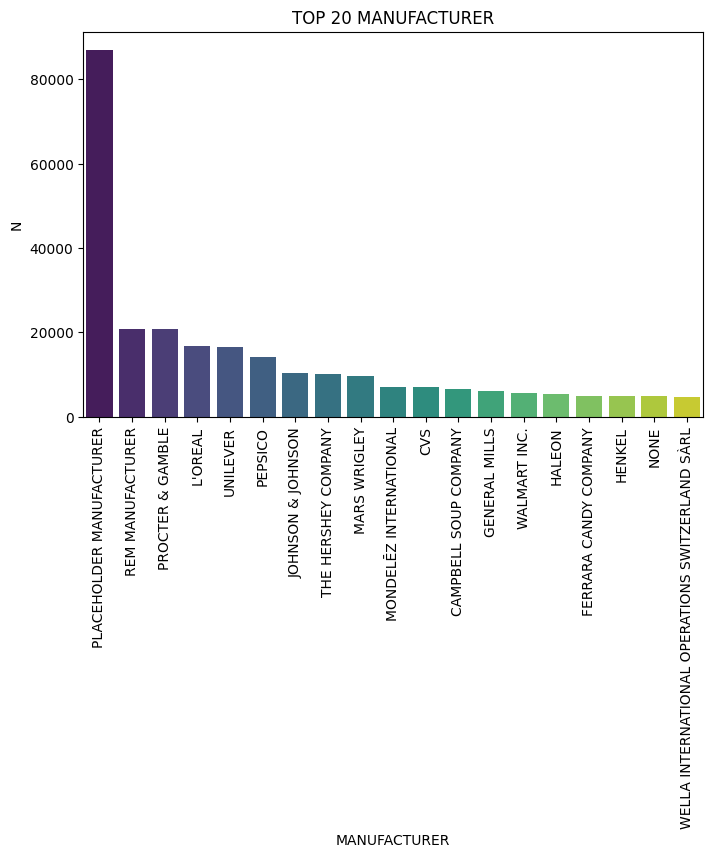

In [335]:
## number of observations per MANUFACTURER, top 20 with more obs
# SQL Query to filter, group, and sort
query = """
SELECT MANUFACTURER, COUNT(BARCODE) AS N
FROM products
GROUP BY MANUFACTURER
ORDER BY N DESC
LIMIT 20
"""


top_brands = ps.sqldf(query, locals())
plt.figure(figsize=(8, 5))

# Plot
sns.barplot(data=top_brands, x="MANUFACTURER", y="N", palette="viridis")

# Customize labels and title
plt.xlabel("MANUFACTURER")
plt.ylabel("N")
plt.title("TOP 20 MANUFACTURER")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()




/var/folders/93/h3g2jvn15rs8w2h9w6hcv55h0000gn/T/ipykernel_5077/1963408216.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




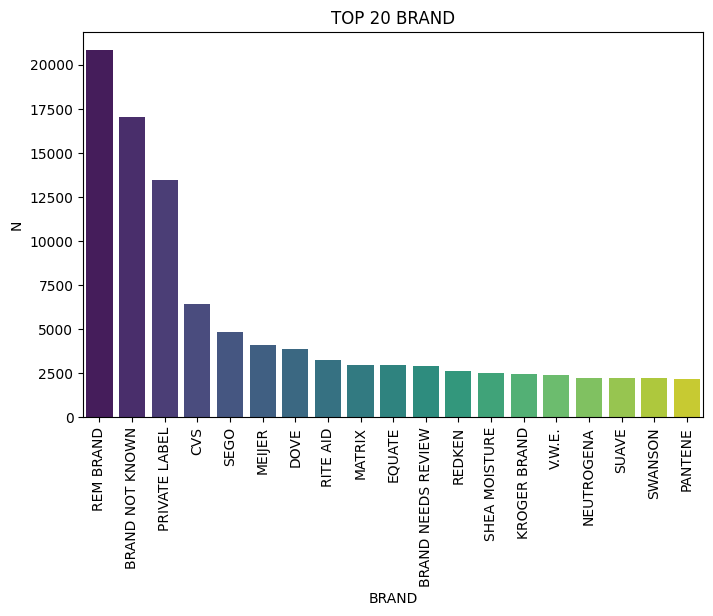

In [336]:
## number of observations per brand, top 20 with more obs
query = """
SELECT BRAND, COUNT(BARCODE) AS N
FROM products
GROUP BY BRAND
ORDER BY N DESC
LIMIT 20
"""
top_brands = ps.sqldf(query, locals())

plt.figure(figsize=(8, 5))

# Plot
sns.barplot(data=top_brands, x="BRAND", y="N", palette="viridis")

# Customize labels and title
plt.xlabel("BRAND")
plt.ylabel("N")
plt.title("TOP 20 BRAND")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()




CONCLUSIONS ON THE QUESTIONS:
Are there any data quality issues present?
    YES, MISSINGS:
    From 1-4 categories, the Category 4 has 92% of the total data as missing, wonder if it is an issue on how the data is captured or nature of the business eg no standard categorization of item at that level
    Barcode has missings .047% of missings: this is relevant because bar code matches wIth Products table, in such case as as those are few, need to be excluded when merging tables.
    Manufacturer and brand are also with missing information (26% of the data): relevant if a research question is about that information

Are there any fields that are challenging to understand?
    Not sure how to interpret this question. For this table, fields were descriptive by the name and values but would be helpful to have the description of the categories 1-4 and how the such labels are created, so then it can be clear how to interpret those.

## Transactions

- Explore the data visually and by its statistics

In [347]:
transaction.head(20) #Check

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586 Z,WALMART,5f850bc9cf9431165f3ac175,4.920091e+10,1.00,
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,zero,3.59
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931 Z,WALMART,61a6d926f998e47aad33db66,5.200001e+10,1.00,
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787 Z,ALDI,66686fc2e04f743a096ea808,NaN,zero,2.29


In [348]:
print("----------------------------------- Transaction")
print("\nTransaction: Total ", len(transaction), " and Count of NaN in each column relative to the dataset total:\n", 100*transaction.isnull().sum()/len(transaction), "\n------ Describe \n", transaction.describe(), "\n------- Data types \n", transaction.dtypes)

----------------------------------- Transaction

Transaction: Total  50000  and Count of NaN in each column relative to the dataset total:
 RECEIPT_ID         0.000
PURCHASE_DATE      0.000
SCAN_DATE          0.000
STORE_NAME         0.000
USER_ID            0.000
BARCODE           11.524
FINAL_QUANTITY     0.000
FINAL_SALE         0.000
dtype: float64 
------ Describe 
             BARCODE
count  4.423800e+04
mean   1.715863e+11
std    3.269219e+11
min   -1.000000e+00
25%    3.077212e+10
50%    5.210004e+10
75%    8.536765e+10
max    9.347108e+12 
------- Data types 
 RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object


In [349]:
transaction[transaction['FINAL_QUANTITY']=='zero']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,zero,3.59
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787 Z,ALDI,66686fc2e04f743a096ea808,NaN,zero,2.29
...,...,...,...,...,...,...,...,...
24991,ffebda11-ff18-46e0-8455-cef0679558cc,2024-08-03,2024-08-13 18:36:52.294 Z,DOLLAR GENERAL STORE,65935f6499b40f103b64fc0c,7.940059e+10,zero,4.25
24993,ffef10cb-52ac-4123-aa87-0d65e85b6ef7,2024-07-21,2024-07-27 19:44:19.898 Z,WALMART,65bfb83d7050d0a6206c7b15,7.940045e+10,zero,6.97
24995,fff60bb7-bf93-4e6b-8055-4d7688da7ead,2024-08-29,2024-08-29 23:47:50.471 Z,WALMART,5eb887f71699c213b1abe2e1,7.874221e+10,zero,1.23
24997,fffbb112-3cc5-47c2-b014-08db2f87e0c7,2024-07-30,2024-08-04 11:43:31.474 Z,WALMART,5eb59d6be7012d13941af5e2,8.180000e+11,zero,4.88


- Some fields as dates are not date types, need to treat properly.
- FINAL_SALE and FINAL_NUMERIC are both character types, but the entity relation model indicate should be numeric.
- Additionally, there are observations where FINAL_QUANTITY is with value 'zero' but FINAL_SALE corresponds a non-zero number, which could suggest a charge. In the next assessmet we figure it out this is because of duplicated data that could go into the system by human errors for example. Hard to do an interpretation without the knowledge of the process itself. Some BARCODE = -1, as it is shown above.
- FINAL_SALE missing data, is the interpretation to be zero?


In [607]:
transaction.groupby('FINAL_QUANTITY')['RECEIPT_ID'].count()

FINAL_QUANTITY
0.01        1
0.04        1
0.09        2
0.23        4
0.24        1
        ...  
6.22        1
7.00        7
8.00        8
9.00        3
zero    12500
Name: RECEIPT_ID, Length: 87, dtype: int64

In [352]:
transaction.groupby(['FINAL_QUANTITY','FINAL_SALE'])['RECEIPT_ID'].count()


FINAL_QUANTITY  FINAL_SALE
0.01            0.05           1
0.04            0.24           1
0.09                           1
                0.12           1
0.23                           1
                              ..
zero            9.96           9
                9.97          30
                9.98          35
                9.99          68
                90.00          1
Name: RECEIPT_ID, Length: 3141, dtype: int64

# Addressing the data types

In [376]:
transaction['FINAL_QUANTITY_NUMERIC'] = transaction['FINAL_QUANTITY'].apply(lambda x: float(x) if x != 'zero' else 0.0)


In [377]:
#let's observe the data
transaction['FINAL_QUANTITY_NUMERIC'].describe()

count    50000.000000
mean         0.814427
std          1.841794
min          0.000000
25%          0.007500
50%          1.000000
75%          1.000000
max        276.000000
Name: FINAL_QUANTITY_NUMERIC, dtype: float64

In [378]:
# Final sale numeric
transaction_clean = transaction[~transaction['BARCODE'].isna()]
print(len(transaction_clean))
transaction_clean['FINAL_SALE_NUMERIC'] = transaction_clean['FINAL_SALE'].apply(
    lambda x: 0.0 if pd.isna(x) or x == '' else float(x) if str(x).strip().replace('.', '', 1).isdigit() else np.nan
)
transaction_clean[['FINAL_SALE','FINAL_SALE_NUMERIC']]

44238


,FINAL_SALE,FINAL_SALE_NUMERIC
0,,NaN
2,,NaN
3,3.49,3.49
4,,NaN
5,1.46,1.46
...,...,...
49995,1.18,1.18
49996,2.00,2.00
49997,20.96,20.96
49998,3.00,3.00


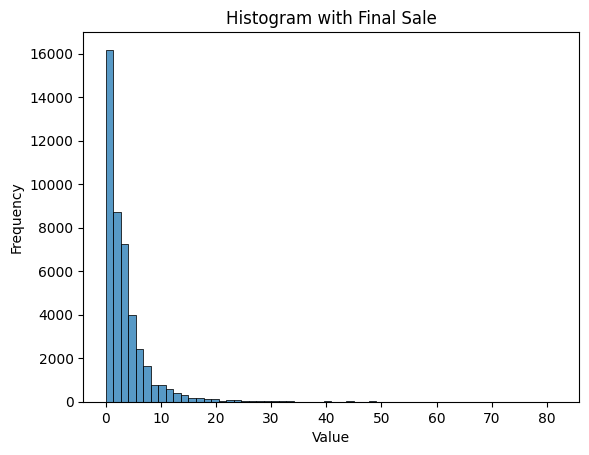

In [608]:
data = transaction_clean['FINAL_SALE_NUMERIC'].values
#small sales in general, might be relevant to aggregate by year and brand
sns.histplot(data, bins=60, kde=False)


plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram with Final Sale")

plt.show()

In [380]:
#lets observe the data
transaction_clean['FINAL_SALE_NUMERIC'].describe()

count    33195.000000
mean         4.548746
std          4.870626
min          0.000000
25%          1.880000
50%          3.180000
75%          5.290000
max         81.810000
Name: FINAL_SALE_NUMERIC, dtype: float64

In [381]:
transaction_clean[transaction_clean['FINAL_SALE_NUMERIC'].isna()]['FINAL_QUANTITY_NUMERIC'].describe()

count    11043.000000
mean         1.092220
std          2.651546
min          0.090000
25%          1.000000
50%          1.000000
75%          1.000000
max        276.000000
Name: FINAL_QUANTITY_NUMERIC, dtype: float64

In [382]:
transaction_clean['FINAL_SALE_NUMERIC']=transaction_clean['FINAL_SALE_NUMERIC'].fillna(0)
transaction_clean['PURCHASE_DATE_CT'] = pd.to_datetime(transaction_clean['PURCHASE_DATE'])
transaction_clean['PURCHASE_DATE_CT'] = transaction_clean['PURCHASE_DATE_CT'].dt.tz_localize('UTC')

In [383]:
transaction_clean

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,FINAL_SALE_NUMERIC,PURCHASE_DATE_CT
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,,1.0,0.00,2024-08-21 00:00:00+00:00
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,,1.0,0.00,2024-08-18 00:00:00+00:00
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49,0.0,3.49,2024-06-18 00:00:00+00:00
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,,1.0,0.00,2024-07-04 00:00:00+00:00
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46,0.0,1.46,2024-06-24 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18,2.0,1.18,2024-08-21 00:00:00+00:00
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00,1.0,2.00,2024-08-11 00:00:00+00:00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96,1.0,20.96,2024-07-11 00:00:00+00:00
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00,1.0,3.00,2024-06-18 00:00:00+00:00


WARNING: some cases are observed as for same user many SAME BARCODE, liked to quantities (zero, 1) for example or (1,1) and the final sale does not match in such case for both rows, which leads into the conclusion that probably the data is being duplicated for some cases.

In [402]:
transaction_clean.dtypes

RECEIPT_ID                             object
PURCHASE_DATE                          object
SCAN_DATE                              object
STORE_NAME                             object
USER_ID                                object
BARCODE                               float64
FINAL_QUANTITY                         object
FINAL_SALE                             object
FINAL_QUANTITY_NUMERIC                float64
FINAL_SALE_NUMERIC                    float64
PURCHASE_DATE_CT          datetime64[ns, UTC]
dtype: object

In [403]:
## dates
pd.set_option('copy_on_write', True)


In [404]:
transaction_clean.to_parquet('../1_data/processed/TRANSACTION_TAKEHOME_clean.parquet')


CONCLUSIONS ON THE QUESTIONS:
* Are there any data quality issues present?
    - YES, MISSINGS:
    seems to be the data set with more complete data, the only field with missing information is BARCODE about 11% onf the total entries
    - DATA TYPES:
    FINAL_QUANTITY and FINAL_SALE are not numeric but combining strings to represent zero, final quantity reported fractions of number eg .6 which does not makes much sense at frst instance, there were quantities=1 with a final sale missing, seems like an inconsistency.
        -  PURCHASE_DATE and SCAN_DATE are both character originally, needs to be transformed to datetype properly.

* Are there any fields that are challenging to understand?
    - Fields were very descriptive them-selves, but some values did not make sense as the FINAL_QUANTITY reporting fractions lower than 1. wondering f that is the case of poor collection fo data, data processing.

In [405]:
#reading
trt = pd.read_parquet('../1_data/processed/TRANSACTION_TAKEHOME_clean.parquet')
trt

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,FINAL_SALE_NUMERIC,PURCHASE_DATE_CT
index,,,,,,,,,,,
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,,1.0,0.00,2024-08-21 00:00:00+00:00
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,,1.0,0.00,2024-08-18 00:00:00+00:00
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49,0.0,3.49,2024-06-18 00:00:00+00:00
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,,1.0,0.00,2024-07-04 00:00:00+00:00
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46,0.0,1.46,2024-06-24 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18,2.0,1.18,2024-08-21 00:00:00+00:00
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00,1.0,2.00,2024-08-11 00:00:00+00:00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96,1.0,20.96,2024-07-11 00:00:00+00:00


## User

In [406]:
user

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,BIRTH_DATE_FIX,CREATED_DATE_CT
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00.000 Z,CA,es-419,female,2000-08-11 00:00:00+00:00,2020-06-24 20:17:54+00:00
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00.000 Z,PA,en,female,2001-09-24 04:00:00+00:00,2021-01-03 19:53:55+00:00
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00.000 Z,FL,es-419,female,1994-10-28 00:00:00+00:00,2023-05-31 18:42:18+00:00
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,0,NC,en,NaN,NaT,2023-12-26 01:46:22+00:00
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00.000 Z,PA,en,female,1972-03-19 00:00:00+00:00,2023-10-28 11:51:50+00:00
...,...,...,...,...,...,...,...,...
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12+00:00,1992-03-16 08:00:00.000 Z,CA,en,female,1992-03-16 08:00:00+00:00,2022-02-03 16:46:12+00:00
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39+00:00,1993-09-23 05:00:00.000 Z,MO,en,female,1993-09-23 05:00:00+00:00,2022-12-08 13:34:39+00:00
99997,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05+00:00,1983-04-19 00:00:00.000 Z,RI,en,female,1983-04-19 00:00:00+00:00,2022-11-22 23:45:05+00:00
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04+00:00,1995-06-09 04:00:00.000 Z,DE,en,female,1995-06-09 04:00:00+00:00,2020-07-14 16:50:04+00:00


In [407]:
user.columns

Index(['ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER',
       'BIRTH_DATE_FIX', 'CREATED_DATE_CT'],
      dtype='object')

In [408]:
print("----------------------------------- User")
print("\nUser: Total ", len(user), " and Count of NaN in each column relative to the dataset total:\n", 100*user.isnull().sum()/len(user), "\nDescribe \n", user.describe(), "\nData types \n", user.dtypes)

----------------------------------- User

User: Total  100000  and Count of NaN in each column relative to the dataset total:
 ID                  0.000
CREATED_DATE        0.000
BIRTH_DATE          0.000
STATE               4.812
LANGUAGE           30.508
GENDER              5.892
BIRTH_DATE_FIX      3.675
CREATED_DATE_CT     0.000
dtype: float64 
Describe 
                               ID                         CREATED_DATE  \
count                     100000                               100000   
unique                    100000                                  NaN   
top     5ef3b4f17053ab141787697d                                  NaN   
freq                           1                                  NaN   
mean                         NaN  2022-01-07 05:31:20.864859648+00:00   
min                          NaN            2014-04-18 23:14:55+00:00   
25%                          NaN            2020-12-01 21:16:19+00:00   
50%                          NaN            2022-03-07

In [409]:
user_clean = user
user_clean['CREATED_DATE'] = pd.to_datetime(user_clean['CREATED_DATE'])


In [410]:
# dealing with the date data
user_clean['BIRTH_DATE_FIX'] = pd.to_datetime(user_clean['BIRTH_DATE'], errors='coerce')
user_clean['CREATED_DATE_CT'] = pd.to_datetime(user_clean['CREATED_DATE'])
user_clean['CREATED_DATE_CT'] = user_clean['CREATED_DATE_CT'].dt.tz_convert('UTC')


In [411]:
user_clean

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,BIRTH_DATE_FIX,CREATED_DATE_CT
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00.000 Z,CA,es-419,female,2000-08-11 00:00:00+00:00,2020-06-24 20:17:54+00:00
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00.000 Z,PA,en,female,2001-09-24 04:00:00+00:00,2021-01-03 19:53:55+00:00
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00.000 Z,FL,es-419,female,1994-10-28 00:00:00+00:00,2023-05-31 18:42:18+00:00
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,0,NC,en,NaN,NaT,2023-12-26 01:46:22+00:00
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00.000 Z,PA,en,female,1972-03-19 00:00:00+00:00,2023-10-28 11:51:50+00:00
...,...,...,...,...,...,...,...,...
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12+00:00,1992-03-16 08:00:00.000 Z,CA,en,female,1992-03-16 08:00:00+00:00,2022-02-03 16:46:12+00:00
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39+00:00,1993-09-23 05:00:00.000 Z,MO,en,female,1993-09-23 05:00:00+00:00,2022-12-08 13:34:39+00:00
99997,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05+00:00,1983-04-19 00:00:00.000 Z,RI,en,female,1983-04-19 00:00:00+00:00,2022-11-22 23:45:05+00:00
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04+00:00,1995-06-09 04:00:00.000 Z,DE,en,female,1995-06-09 04:00:00+00:00,2020-07-14 16:50:04+00:00


In [412]:
user_clean.to_csv('../1_data/processed/USER_TAKEHOME_clean.csv')


CONCLUSIONS
ON
THE
QUESTIONS:
* Are there any data quality issues present?
    - YES, MISSINGS: mostly on the field called LANGUAGE, and other socio demographics. Important that ID and CREATED_DATE are not missings as those are key values.
    - DATA TYPES: CREATED_DATE and BIRTH_DATE are characters and need to be treated as dates.

* Are there any fields that are challenging to understand?
    - Fields were very descriptive

# Challenge 2

In [ ]:
transaction_clean = pd.read_parquet('../1_data/processed/TRANSACTION_TAKEHOME_clean.parquet')
user_clean = pd.read_csv('../1_data/processed/USER_TAKEHOME_clean.csv')
products_clean = pd.read_csv('../1_data/processed/PRODUCTS_TAKEHOME_clean.parquet')


In [416]:
# Before merging the datasets we need to evaluate if those already correspond to the relationship described in the entity diagram.
# users and transactions correspond 1 to many, would be enough to group by transactions to se how many users each transaction have, shoudl be 1
transaction_clean.groupby('RECEIPT_ID')['USER_ID'].nunique()

# Correct!

RECEIPT_ID
0000d256-4041-4a3e-adc4-5623fb6e0c99    1
00017e0a-7851-42fb-bfab-0baa96e23586    1
000239aa-3478-453d-801e-66a82e39c8af    1
00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    1
0002d8cd-1701-4cdd-a524-b70402e2dbc0    1
                                       ..
fff60bb7-bf93-4e6b-8055-4d7688da7ead    1
fff6c6c8-e002-4262-85ea-25849d9721db    1
fffbb112-3cc5-47c2-b014-08db2f87e0c7    1
fffbfb2a-7c1f-41c9-a5da-628fa7fcc746    1
fffe8012-7dcf-4d84-b6c6-feaacab5074a    1
Name: USER_ID, Length: 21639, dtype: int64

In [417]:
#same with products
transaction_clean.groupby('RECEIPT_ID')['BARCODE'].nunique()
#OK!

RECEIPT_ID
0000d256-4041-4a3e-adc4-5623fb6e0c99    1
00017e0a-7851-42fb-bfab-0baa96e23586    1
000239aa-3478-453d-801e-66a82e39c8af    1
00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    1
0002d8cd-1701-4cdd-a524-b70402e2dbc0    1
                                       ..
fff60bb7-bf93-4e6b-8055-4d7688da7ead    1
fff6c6c8-e002-4262-85ea-25849d9721db    1
fffbb112-3cc5-47c2-b014-08db2f87e0c7    1
fffbfb2a-7c1f-41c9-a5da-628fa7fcc746    1
fffe8012-7dcf-4d84-b6c6-feaacab5074a    1
Name: BARCODE, Length: 21639, dtype: int64

In [426]:
transaction_clean[transaction_clean['RECEIPT_ID']=='8528a807-325d-43e0-954f-4cc2c71603d4']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,FINAL_SALE_NUMERIC,PURCHASE_DATE_CT
12934,8528a807-325d-43e0-954f-4cc2c71603d4,2024-07-12,2024-07-12 18:53:06.298 Z,WALMART,656946b99cb6a4f05dc9f0e2,3.400054e+10,1.00,,1.0,0.00,2024-07-12 00:00:00+00:00
12935,8528a807-325d-43e0-954f-4cc2c71603d4,2024-07-12,2024-07-12 18:53:06.298 Z,WALMART,656946b99cb6a4f05dc9f0e2,4.300020e+10,zero,1.48,0.0,1.48,2024-07-12 00:00:00+00:00
39650,8528a807-325d-43e0-954f-4cc2c71603d4,2024-07-12,2024-07-12 18:53:06.298 Z,WALMART,656946b99cb6a4f05dc9f0e2,3.400054e+10,1.00,3.48,1.0,3.48,2024-07-12 00:00:00+00:00
44504,8528a807-325d-43e0-954f-4cc2c71603d4,2024-07-12,2024-07-12 18:53:06.298 Z,WALMART,656946b99cb6a4f05dc9f0e2,4.300020e+10,1.00,1.48,1.0,1.48,2024-07-12 00:00:00+00:00


In [431]:
# FROM EXAMPLE ABOVE I WILL REQUIRE TO FILTER incorrect transactions as the 1rst and 3rd rows
query = """
SELECT * FROM (
    SELECT *,
           ROW_NUMBER() OVER (
               PARTITION BY BARCODE
               ORDER BY
                   CASE
                       WHEN FINAL_QUANTITY_NUMERIC > 0 THEN 1  -- Prefer valid FINAL_QUANTITY
                       ELSE 2
                   END,
                   FINAL_SALE DESC  -- Prefer higher FINAL_SALE
           ) AS row_num
    FROM transaction_clean
) t
WHERE row_num = 1;
"""

filtered_transactions = ps.sqldf(query, locals())

len(filtered_transactions)


11027

In [432]:
filtered_transactions[filtered_transactions['RECEIPT_ID']=='8528a807-325d-43e0-954f-4cc2c71603d4']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,FINAL_SALE_NUMERIC,PURCHASE_DATE_CT,row_num
2940,8528a807-325d-43e0-954f-4cc2c71603d4,2024-07-12,2024-07-12 18:53:06.298 Z,WALMART,656946b99cb6a4f05dc9f0e2,3.400054e+10,1.00,3.48,1.0,3.48,2024-07-12 00:00:00.000000,1
4450,8528a807-325d-43e0-954f-4cc2c71603d4,2024-07-12,2024-07-12 18:53:06.298 Z,WALMART,656946b99cb6a4f05dc9f0e2,4.300020e+10,1.00,1.48,1.0,1.48,2024-07-12 00:00:00.000000,1


In [437]:
#potential duplicates in the remaining entities
print(user_clean['ID'].duplicated().sum())  # Should be 0
print(products_clean['BARCODE'].duplicated().sum())  # Should be 0


0
185


In [438]:
products_clean

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


In [439]:
products_clean.groupby('BARCODE').count()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
BARCODE,,,,,,
1.850000e+02,1,1,1,1,1,1
3.582000e+03,1,1,1,0,0,0
4.091000e+03,1,1,1,0,1,1
5.579000e+03,1,1,1,0,0,0
5.777000e+03,1,1,1,1,1,1
...,...,...,...,...,...,...
1.089518e+13,1,1,1,0,0,0
5.010725e+13,1,1,1,0,1,1
5.411446e+13,1,1,1,0,1,1


In [441]:
products_clean[products_clean['BARCODE']==3404201.0]

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
160285,Snacks,Candy,Mints,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3404201.0
600163,Snacks,Candy,Mints,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3404201.0


In [442]:
#non duplicates
products_clean_uniques = products_clean.drop_duplicates()
len(products_clean_uniques)

841369

In [447]:
products_clean_uniques.groupby('BARCODE').count()


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
BARCODE,,,,,,
1.850000e+02,1,1,1,1,1,1
3.582000e+03,1,1,1,0,0,0
4.091000e+03,1,1,1,0,1,1
5.579000e+03,1,1,1,0,0,0
5.777000e+03,1,1,1,1,1,1
...,...,...,...,...,...,...
1.089518e+13,1,1,1,0,0,0
5.010725e+13,1,1,1,0,1,1
5.411446e+13,1,1,1,0,1,1


In [448]:
products_clean_uniques[products_clean_uniques['BARCODE']==20733056.0]


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
206172,Snacks,Crackers,Graham Crackers,NaN,"LIDL US, LLC",LIDL,20733056.0
720019,Snacks,Crackers,Graham Crackers,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,20733056.0


In [449]:
# FROM EXAMPLE ABOVE I WILL REQUIRE TO FILTER incorrect transactions as the 1rst and 3rd rows
query = """
WITH RankedProducts AS (
    SELECT *,
           ROW_NUMBER() OVER (
               PARTITION BY BARCODE
               ORDER BY
                   CASE
                       WHEN MANUFACTURER = 'PLACEHOLDER MANUFACTURER' THEN 2  -- Lower priority
                       ELSE 1  -- Keep preferred manufacturers first
                   END
           ) AS row_num
    FROM products_clean_uniques
)
SELECT * FROM RankedProducts WHERE row_num = 1;

"""

products_clean_uniques_v2 = ps.sqldf(query, locals())

len(products_clean_uniques_v2)


841342

## Merging clean datasets

In [450]:
print(filtered_transactions.columns, user_clean.columns, products_clean_uniques_v2.columns)

Index(['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID',
       'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE', 'FINAL_QUANTITY_NUMERIC',
       'FINAL_SALE_NUMERIC', 'PURCHASE_DATE_CT', 'row_num'],
      dtype='object') Index(['ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER',
       'BIRTH_DATE_FIX', 'CREATED_DATE_CT'],
      dtype='object') Index(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER',
       'BRAND', 'BARCODE', 'row_num'],
      dtype='object')


In [477]:
filtered_transactions['USER_ID'] = filtered_transactions['USER_ID'].apply(lambda x: str(x).replace(" ",""))
user_clean['ID'] = user_clean['ID'].apply(lambda x: str(x).replace(' ',''))


In [478]:
## SQL based
import pandasql as ps


# Step 1: Join transactions with products
query_1 = """
SELECT t.*,
       p.CATEGORY_1, p.CATEGORY_2, p.CATEGORY_3, p.CATEGORY_4,
       p.MANUFACTURER, p.BRAND
FROM filtered_transactions t
LEFT JOIN products_clean_uniques_v2 p
ON t.BARCODE = p.BARCODE;
"""
transactions_products = ps.sqldf(query_1, locals())

# Step 2: Join the first result with user_clean
query_2 = """
SELECT tp.*,
       u.ID, u.CREATED_DATE, u.BIRTH_DATE, u.STATE, u.LANGUAGE,
       u.GENDER, u.BIRTH_DATE_FIX, u.CREATED_DATE_CT
FROM transactions_products tp
INNER JOIN user_clean u
ON tp.USER_ID = u.ID;
"""
final_merged_df = ps.sqldf(query_2, locals())

# Display final DataFrame
final_merged_df



,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,FINAL_SALE_NUMERIC,...,MANUFACTURER,BRAND,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,BIRTH_DATE_FIX,CREATED_DATE_CT
0,589dc798-7692-46f6-8664-e6cb8571a7c6,2024-06-21,2024-06-21 13:34:35.381 Z,FIRELAKE EXPRESS GROCERY,6323afdd138f4b3c62bc6e03,2.670013e+09,1.00,3.89,1.0,3.89,...,DAIRY FARMERS OF AMERICA,DEAN'S DAIRY,6323afdd138f4b3c62bc6e03,2022-09-15 23:06:05.000000,1958-07-17 00:00:00.000 Z,OK,en,female,1958-07-17 00:00:00.000000,2022-09-15 23:06:05.000000
1,04e48cb8-ee37-49a8-9d4a-4331a06fe687,2024-08-06,2024-08-06 14:12:05.106 Z,WALMART,64dd9170516348066e7c4006,1.111161e+10,1.00,11.97,1.0,11.97,...,UNILEVER,DOVE,64dd9170516348066e7c4006,2023-08-17 03:18:08.000000,1993-12-11 04:18:09.000 Z,SC,en,female,1993-12-11 04:18:09.000000,2023-08-17 03:18:08.000000
2,af352c94-06fb-4e09-a513-2eb06471b074,2024-08-14,2024-08-26 18:04:26.351 Z,WALMART,5f9414c65896841696c17359,1.111161e+10,1.00,11.97,1.0,11.97,...,UNILEVER,DOVE,5f9414c65896841696c17359,2020-10-24 11:49:27.000000,1972-05-26 00:00:00.000 Z,FL,en,male,1972-05-26 00:00:00.000000,2020-10-24 11:49:27.000000
3,a593f305-4cd0-4e6a-ba77-d01c7058936e,2024-06-20,2024-06-20 13:46:10.350 Z,WALGREENS,6236764181c1450ec756f06d,1.204405e+10,1.00,4.24,1.0,4.24,...,PROCTER & GAMBLE,OLD SPICE,6236764181c1450ec756f06d,2022-03-20 00:33:05.000000,1993-01-05 05:00:00.000 Z,NJ,en,male,1993-01-05 05:00:00.000000,2022-03-20 00:33:05.000000
4,703cf412-bf3c-45fc-8b15-e16db23522ed,2024-07-20,2024-07-21 11:17:39.758 Z,SAM'S CLUB,62ffec490d9dbaff18c0a999,1.254601e+10,1.00,11.68,1.0,11.68,...,PERFETTI VAN MELLE,TRIDENT,62ffec490d9dbaff18c0a999,2022-08-19 20:02:17.000000,1951-12-24 05:00:00.000 Z,NY,en,female,1951-12-24 05:00:00.000000,2022-08-19 20:02:17.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,7297a22f-4a0a-4377-9eae-c8fb3e35ea4c,2024-08-25,2024-08-25 15:42:48.533 Z,WALMART,6615dab878ee6750bbc350ea,8.177190e+11,1.00,6.98,1.0,6.98,...,None,None,6615dab878ee6750bbc350ea,2024-04-10 00:18:00.000000,1984-04-28 00:00:00.000 Z,VA,en,female,1984-04-28 00:00:00.000000,2024-04-10 00:18:00.000000
59,1a382554-9570-4793-a5fe-ed2a0ad47d18,2024-06-25,2024-06-25 20:53:10.242 Z,WINCO FOODS,5eabc94afb448d147203bf11,8.510930e+11,1.00,2.48,1.0,2.48,...,GIMME HEALTH FOODS LLC,GIMME,5eabc94afb448d147203bf11,2020-05-01 07:01:30.000000,1968-06-20 00:00:00.000 Z,WA,en,female,1968-06-20 00:00:00.000000,2020-05-01 07:01:30.000000
60,0cdf9b13-d700-437c-8e2a-4452bb6f2506,2024-09-07,2024-09-07 13:25:24.501 Z,MC,5ca54049adfcb4140b54e1bf,8.762740e+11,1.00,1.25,1.0,1.25,...,None,None,5ca54049adfcb4140b54e1bf,2019-04-03 23:22:49.000000,1990-06-14 04:00:00.000 Z,NC,en,female,1990-06-14 04:00:00.000000,2019-04-03 23:22:49.000000
61,c0cad009-38a3-4009-9c84-c935c4429cdb,2024-08-11,2024-08-17 21:26:16.472 Z,PIC PAC SUPERMARKET,5f222804d52f48146ba7112e,8.849121e+11,1.00,5.39,1.0,5.39,...,None,None,5f222804d52f48146ba7112e,2020-07-30 01:53:09.000000,1969-04-17 05:00:00.000 Z,KY,en,female,1969-04-17 05:00:00.000000,2020-07-30 01:53:09.000000


In [486]:
len(final_merged_df), len(filtered_transactions)
#All set!

(63, 11027)

In [487]:
final_merged_df.to_csv('../1_data/processed/snapshot_021325.csv')

In [550]:
final_merged_df.to_csv('../1_data/processed/snapshot_021325_2.csv')


## Create variables relatives to dates as the age when a user registration


In [488]:
merged_df["BIRTH_DATE"] = pd.to_datetime(merged_df['BIRTH_DATE'], errors='coerce')
merged_df["CREATED_DATE"] = pd.to_datetime(merged_df['CREATED_DATE'], errors='coerce')

In [489]:
merged_df['CREATED_DATE'] = pd.to_datetime(merged_df['CREATED_DATE']).dt.tz_localize(None)
merged_df['BIRTH_DATE'] = pd.to_datetime(merged_df['BIRTH_DATE']).dt.tz_localize(None)


In [506]:
# create AGE_WHEN_CREATION years between birth date and date of creation both from USERS table
merged_df['AGE_WHEN_CREATION'] = merged_df.apply(
    lambda row: np.floor((row['CREATED_DATE'] - row['BIRTH_DATE']).days / 365.25)
    if pd.notnull(row['CREATED_DATE']) and pd.notnull(row['BIRTH_DATE']) else np.nan,
    axis=1
)



In [507]:
merged_df[merged_df['CREATED_DATE'].isna()]#[['CREATED_DATE','BIRTH_DATE','AGE_WHEN_CREATION']]

,Unnamed: 0,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,...,CREATED_DATE_CT,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,AGE_WHEN_CREATION,TIME_AS_USER_WHEN_PURCHASING,TIME_AS_USER_WHEN_PURCHASING_MO
0,0,01cdaa22-a912-496b-8287-87cd9e6b3b1a,2024-07-16,2024-07-17 06:37:09.218 Z,CARRS,6160f71f28dab1659e8b5616,-1.000000e+00,1.0,5.00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7da004c4-f8f3-46ad-826a-e9c9e7f462c0,2024-09-08,2024-09-08 15:51:29.650 Z,COSTCO,5fa1dd684462ea181f4da98a,2.226000e+03,1.0,8.49,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4b9f2a9a-18e9-4364-96e9-f1bcdaf7965a,2024-07-15,2024-07-21 10:19:41.135 Z,ALDI,623fe4c396e6b63587b1374c,3.105900e+04,1.0,9.99,1.0,...,NaN,Snacks,Nuts & Seeds,Cashews,NaN,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,NaN,NaN,NaN
3,3,212b6bcf-dd41-4f29-8865-2e7ce55e072f,2024-06-22,2024-06-22 13:00:54.291 Z,WALMART,5e4e0e0df1ce71141ba59cea,3.107300e+04,6.0,5.88,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4f2a487b-9f65-4398-95a4-677e6f544aee,2024-06-28,2024-07-03 11:45:43.293 Z,SAM'S CLUB,5da3da8e3484903a01f865e6,3.374900e+04,1.0,8.42,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11022,11022,06c2a54c-7039-41f8-8ece-4f6f14513d52,2024-06-28,2024-06-29 14:41:28.901 Z,WALMART,63ace97401cb7c888c6f944c,7.702011e+12,1.0,0.92,1.0,...,NaN,Snacks,Cookies,NaN,NaN,"IBERIA FOODS, LLC.",IBERIA,NaN,NaN,NaN
11023,11023,2ca03b5b-cd86-4c35-ac50-7b0618a7709b,2024-08-10,2024-08-10 11:35:24.233 Z,DOLLAR GENERAL STORE,63135413b2906b770ea7c637,8.690840e+12,1.0,1.00,1.0,...,NaN,Snacks,Candy,Confection Candy,NaN,NaN,NaN,NaN,NaN,NaN
11024,11024,29fb2939-1fbf-4f97-b8e9-41d1efe4c942,2024-07-10,2024-07-19 12:21:34.451 Z,ROSES,5ff5c0d9d0678d12b5454eda,8.711701e+12,1.0,1.25,1.0,...,NaN,Health & Wellness,Bath & Body,Bar Soap,NaN,UNILEVER,DOVE,NaN,NaN,NaN
11025,11025,6b4a91e4-0939-43d7-86c5-ebc303d3bace,2024-08-17,2024-08-17 11:24:17.899 Z,WALMART,64b1ab88fc78d9a0a9244021,8.901697e+12,1.0,8.00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [508]:
merged_df

,Unnamed: 0,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,...,CREATED_DATE_CT,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,AGE_WHEN_CREATION,TIME_AS_USER_WHEN_PURCHASING,TIME_AS_USER_WHEN_PURCHASING_MO
0,0,01cdaa22-a912-496b-8287-87cd9e6b3b1a,2024-07-16,2024-07-17 06:37:09.218 Z,CARRS,6160f71f28dab1659e8b5616,-1.000000e+00,1.0,5.00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7da004c4-f8f3-46ad-826a-e9c9e7f462c0,2024-09-08,2024-09-08 15:51:29.650 Z,COSTCO,5fa1dd684462ea181f4da98a,2.226000e+03,1.0,8.49,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4b9f2a9a-18e9-4364-96e9-f1bcdaf7965a,2024-07-15,2024-07-21 10:19:41.135 Z,ALDI,623fe4c396e6b63587b1374c,3.105900e+04,1.0,9.99,1.0,...,NaN,Snacks,Nuts & Seeds,Cashews,NaN,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,NaN,NaN,NaN
3,3,212b6bcf-dd41-4f29-8865-2e7ce55e072f,2024-06-22,2024-06-22 13:00:54.291 Z,WALMART,5e4e0e0df1ce71141ba59cea,3.107300e+04,6.0,5.88,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4f2a487b-9f65-4398-95a4-677e6f544aee,2024-06-28,2024-07-03 11:45:43.293 Z,SAM'S CLUB,5da3da8e3484903a01f865e6,3.374900e+04,1.0,8.42,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11022,11022,06c2a54c-7039-41f8-8ece-4f6f14513d52,2024-06-28,2024-06-29 14:41:28.901 Z,WALMART,63ace97401cb7c888c6f944c,7.702011e+12,1.0,0.92,1.0,...,NaN,Snacks,Cookies,NaN,NaN,"IBERIA FOODS, LLC.",IBERIA,NaN,NaN,NaN
11023,11023,2ca03b5b-cd86-4c35-ac50-7b0618a7709b,2024-08-10,2024-08-10 11:35:24.233 Z,DOLLAR GENERAL STORE,63135413b2906b770ea7c637,8.690840e+12,1.0,1.00,1.0,...,NaN,Snacks,Candy,Confection Candy,NaN,NaN,NaN,NaN,NaN,NaN
11024,11024,29fb2939-1fbf-4f97-b8e9-41d1efe4c942,2024-07-10,2024-07-19 12:21:34.451 Z,ROSES,5ff5c0d9d0678d12b5454eda,8.711701e+12,1.0,1.25,1.0,...,NaN,Health & Wellness,Bath & Body,Bar Soap,NaN,UNILEVER,DOVE,NaN,NaN,NaN
11025,11025,6b4a91e4-0939-43d7-86c5-ebc303d3bace,2024-08-17,2024-08-17 11:24:17.899 Z,WALMART,64b1ab88fc78d9a0a9244021,8.901697e+12,1.0,8.00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [509]:
#merged_df['PURCHASE_DATE_CT'] = pd.to_datetime(merged_df['PURCHASE_DATE'])
#merged_df['PURCHASE_DATE_CT'] = merged_df['PURCHASE_DATE_CT'].dt.tz_localize('UTC')
merged_df['PURCHASE_DATE_CT'] = merged_df['PURCHASE_DATE_CT'].dt.tz_localize(None)
merged_df['CREATED_DATE'] = merged_df['CREATED_DATE'].dt.tz_localize(None)


print(len(merged_df))

11027


In [515]:
# age when purchasing but in terms of years

merged_df['AGE_WHEN_PURCHASE'] = merged_df.apply(
    lambda row: np.floor((row['PURCHASE_DATE_CT'] - row['BIRTH_DATE']).days / 365.25)
    if pd.notnull(row['PURCHASE_DATE_CT']) and pd.notnull(row['BIRTH_DATE']) else np.nan,
    axis=1
)
# time as user when purchasing but in terms of years
merged_df['TIME_AS_USER_WHEN_PURCHASING'] = merged_df.apply(
    lambda row: np.floor((row['PURCHASE_DATE_CT'] - row['CREATED_DATE']).days / 365.25)
    if pd.notnull(row['PURCHASE_DATE_CT']) and pd.notnull(row['CREATED_DATE']) else np.nan,
    axis=1
)
# time as user when purchasing but in terms of months
merged_df['TIME_AS_USER_WHEN_PURCHASING_MO'] = merged_df.apply(
    lambda row: np.floor((row['PURCHASE_DATE_CT'] - row['CREATED_DATE']).days / 30.4375)
    if pd.notnull(row['PURCHASE_DATE_CT']) and pd.notnull(row['CREATED_DATE']) else np.nan,
    axis=1
)



In [516]:
merged_df.columns

Index(['Unnamed: 0', 'RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME',
       'USER_ID', 'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE',
       'FINAL_QUANTITY_NUMERIC', 'FINAL_SALE_NUMERIC', 'PURCHASE_DATE_CT',
       'row_num', 'ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE', 'LANGUAGE',
       'GENDER', 'BIRTH_DATE_FIX', 'CREATED_DATE_CT', 'CATEGORY_1',
       'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER', 'BRAND',
       'AGE_WHEN_CREATION', 'TIME_AS_USER_WHEN_PURCHASING',
       'TIME_AS_USER_WHEN_PURCHASING_MO', 'AGE_WHEN_PURCHASE'],
      dtype='object')

In [517]:
merged_df['FINAL_SALE_NUMERIC'].unique()

array([ 5.  ,  8.49,  9.99, ..., 22.19,  7.27, 13.69])

## Challenge 2

In [525]:
# What are the top 5 brands by receipts scanned among users 21 and over?

query = """
SELECT BRAND, COUNT(RECEIPT_ID) AS total_sales
FROM merged_df
WHERE AGE_WHEN_PURCHASE >= 21 and BRAND IS NOT NULL
GROUP BY BRAND
ORDER BY total_sales DESC
LIMIT 6
"""

# Execute SQL query on DataFrame
top_brands = ps.sqldf(query, locals())

# Display result
print(top_brands)

             BRAND  total_sales
0  SOUR PATCH KIDS            2
1      NERDS CANDY            2
2           MEIJER            2
3             DOVE            2
4          TRIDENT            1
5         TRESEMMÉ            1


In [527]:
#Q1: What are the top 5 brands by sales among users that have had their account for at least six months?
# step 1: users with at least 6 mo from the creation date to the purchase date

## SQL based
import pandasql as ps


query = """
SELECT BRAND, SUM(FINAL_SALE_NUMERIC) AS total_sales
FROM merged_df
WHERE TIME_AS_USER_WHEN_PURCHASING_MO >= 6 AND BRAND IS NOT NULL
GROUP BY BRAND
ORDER BY total_sales DESC
LIMIT 6
"""

# Execute SQL query on DataFrame
top_brands = ps.sqldf(query, locals())

# Display result
print(top_brands)


         BRAND  total_sales
0          CVS        72.00
1         DOVE        23.94
2  COORS LIGHT        17.48
3     TRESEMMÉ        14.58
4      TRIDENT        11.68
5        CREST         8.97


In [ ]:
# Which is the leading brand in the Dips & Salsa category? To answer this question I will take the information from transactions_products dataset. I refrain from using the merged dataset to keep the absolute information about the transactions that can not be associated exactly to users entity.

In [534]:
transactions_products

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,FINAL_SALE_NUMERIC,PURCHASE_DATE_CT,row_num,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
0,01cdaa22-a912-496b-8287-87cd9e6b3b1a,2024-07-16,2024-07-17 06:37:09.218 Z,CARRS,6160f71f28dab1659e8b5616,-1.000000e+00,1.00,5.00,1.0,5.00,2024-07-16 00:00:00.000000,1,None,None,None,None,None,None
1,7da004c4-f8f3-46ad-826a-e9c9e7f462c0,2024-09-08,2024-09-08 15:51:29.650 Z,COSTCO,5fa1dd684462ea181f4da98a,2.226000e+03,1.00,8.49,1.0,8.49,2024-09-08 00:00:00.000000,1,None,None,None,None,None,None
2,4b9f2a9a-18e9-4364-96e9-f1bcdaf7965a,2024-07-15,2024-07-21 10:19:41.135 Z,ALDI,623fe4c396e6b63587b1374c,3.105900e+04,1.00,9.99,1.0,9.99,2024-07-15 00:00:00.000000,1,Snacks,Nuts & Seeds,Cashews,None,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN
3,212b6bcf-dd41-4f29-8865-2e7ce55e072f,2024-06-22,2024-06-22 13:00:54.291 Z,WALMART,5e4e0e0df1ce71141ba59cea,3.107300e+04,6.00,5.88,6.0,5.88,2024-06-22 00:00:00.000000,1,None,None,None,None,None,None
4,4f2a487b-9f65-4398-95a4-677e6f544aee,2024-06-28,2024-07-03 11:45:43.293 Z,SAM'S CLUB,5da3da8e3484903a01f865e6,3.374900e+04,1.00,8.42,1.0,8.42,2024-06-28 00:00:00.000000,1,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11022,06c2a54c-7039-41f8-8ece-4f6f14513d52,2024-06-28,2024-06-29 14:41:28.901 Z,WALMART,63ace97401cb7c888c6f944c,7.702011e+12,1.00,0.92,1.0,0.92,2024-06-28 00:00:00.000000,1,Snacks,Cookies,None,None,"IBERIA FOODS, LLC.",IBERIA
11023,2ca03b5b-cd86-4c35-ac50-7b0618a7709b,2024-08-10,2024-08-10 11:35:24.233 Z,DOLLAR GENERAL STORE,63135413b2906b770ea7c637,8.690840e+12,1.00,1.00,1.0,1.00,2024-08-10 00:00:00.000000,1,Snacks,Candy,Confection Candy,None,None,None
11024,29fb2939-1fbf-4f97-b8e9-41d1efe4c942,2024-07-10,2024-07-19 12:21:34.451 Z,ROSES,5ff5c0d9d0678d12b5454eda,8.711701e+12,1.00,1.25,1.0,1.25,2024-07-10 00:00:00.000000,1,Health & Wellness,Bath & Body,Bar Soap,None,UNILEVER,DOVE
11025,6b4a91e4-0939-43d7-86c5-ebc303d3bace,2024-08-17,2024-08-17 11:24:17.899 Z,WALMART,64b1ab88fc78d9a0a9244021,8.901697e+12,1.00,8.00,1.0,8.00,2024-08-17 00:00:00.000000,1,None,None,None,None,None,None


In [545]:
import pandas as pd

df = merged_df[merged_df['CATEGORY_2'].str.contains("Sal", na=False)]
df.groupby('BRAND')['FINAL_SALE_NUMERIC'].sum()


BRAND
ALWAYS SAVE               1.99
BISON                     3.29
BOAR'S HEAD               9.48
CHI-CHI'S                 2.34
CLINTS                    3.97
CREAMLAND DAIRY           2.88
DAISY                     5.58
DEAN'S DAIRY              8.67
DEAN'S DAIRY DIP          2.49
ESTI                      3.99
FODY                      5.48
FRESH CRAVINGS           14.34
FRESH CREATIONS           3.69
FRESHNESS GUARANTEED     34.12
FRITO-LAY                 3.50
FRITOS                   19.94
GOOD & GATHER            16.75
GOOD FOODS               44.95
GORDO'S DIPS              9.96
GREAT VALUE              15.00
HELUVA GOOD!             11.64
HERDEZ                   17.72
HIDDEN VALLEY             7.52
HIDDEN VALLEY RANCH      27.35
HILAND                    3.25
ISADORA                   1.74
JULIOS                    5.98
KIRKLAND SIGNATURE       23.48
LA PREFERIDA              2.88
LA TERRA FINA             5.49
LAY'S                    18.16
LITEHOUSE                18.96
MA

In [547]:
# Filter the rows based on 'CATEGORY_2' containing "Sal" and use SQL to group and sum
query = """
SELECT BRAND, SUM(FINAL_SALE_NUMERIC) AS total_sales
FROM merged_df
WHERE CATEGORY_2 LIKE '%Sal%' AND BRAND IS NOT NULL
GROUP BY BRAND
ORDER BY total_sales DESC
LIMIT 5
"""

top_5_brands = ps.sqldf(query, locals())

print(top_5_brands)


                  BRAND  total_sales
0              TOSTITOS        74.79
1                  PACE        47.20
2            MARKETSIDE        45.82
3            GOOD FOODS        44.95
4  FRESHNESS GUARANTEED        34.12


 3rd Comuncate with stackeholders

In [553]:
import pandas
data=pd.read_csv('../1_data/processed/snapshot_021325_2.csv')

In [572]:
merged_df['PURCHASE_DATE_CT'] = merged_df['PURCHASE_DATE_CT'].dt.tz_localize(None)
merged_df['CREATED_DATE'] = merged_df['CREATED_DATE'].dt.tz_localize(None)

merged_df['AGE_WHEN_PURCHASE'] = merged_df.apply(
    lambda row: np.floor((row['PURCHASE_DATE_CT'] - row['BIRTH_DATE']).days / 365.25)
    if pd.notnull(row['PURCHASE_DATE_CT']) and pd.notnull(row['BIRTH_DATE']) else np.nan,
    axis=1
)
# time as user when purchasing but in terms of years
merged_df['TIME_AS_USER_WHEN_PURCHASING'] = merged_df.apply(
    lambda row: np.floor((row['PURCHASE_DATE_CT'] - row['CREATED_DATE']).days / 365.25)
    if pd.notnull(row['PURCHASE_DATE_CT']) and pd.notnull(row['CREATED_DATE']) else np.nan,
    axis=1
)
# time as user when purchasing but in terms of months
merged_df['TIME_AS_USER_WHEN_PURCHASING_MO'] = merged_df.apply(
    lambda row: np.floor((row['PURCHASE_DATE_CT'] - row['CREATED_DATE']).days / 30.4375)
    if pd.notnull(row['PURCHASE_DATE_CT']) and pd.notnull(row['CREATED_DATE']) else np.nan,
    axis=1
)


In [573]:
data.columns

Index(['Unnamed: 0', 'RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME',
       'USER_ID', 'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE',
       'FINAL_QUANTITY_NUMERIC', 'FINAL_SALE_NUMERIC', 'PURCHASE_DATE_CT',
       'row_num', 'CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4',
       'MANUFACTURER', 'BRAND', 'ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE',
       'LANGUAGE', 'GENDER', 'BIRTH_DATE_FIX', 'CREATED_DATE_CT'],
      dtype='object')

In [574]:
import pandas as pd

merged_df['PURCHASE_DATE'] = pd.to_datetime(merged_df['PURCHASE_DATE_CT'])

merged_df['YEAR_MONTH'] = merged_df['PURCHASE_DATE'].dt.to_period('M')


In [575]:
# Group by 'YEAR_MONTH' and calculate average and standard deviation of FINAL_SALE_NUMERIC
monthly_stats = merged_df.groupby('YEAR_MONTH').agg(
    avg_sales=('FINAL_SALE_NUMERIC', 'mean'),
    sd_sales=('FINAL_SALE_NUMERIC', 'std')
).reset_index()

# Display the result
print(monthly_stats)


  YEAR_MONTH  avg_sales  sd_sales
0    2024-06   5.445600  5.507714
1    2024-07   5.642354  5.995441
2    2024-08   5.396537  5.451023
3    2024-09   5.617494  5.852523


In [576]:
# Calculate percentage increments in average sales month-to-month
monthly_stats['pct_increment'] = monthly_stats['avg_sales'].pct_change() * 100

# Display the updated dataframe
monthly_stats


,YEAR_MONTH,avg_sales,sd_sales,pct_increment
0,2024-06,5.445600,5.507714,NaN
1,2024-07,5.642354,5.995441,3.613070
2,2024-08,5.396537,5.451023,-4.356643
3,2024-09,5.617494,5.852523,4.094431


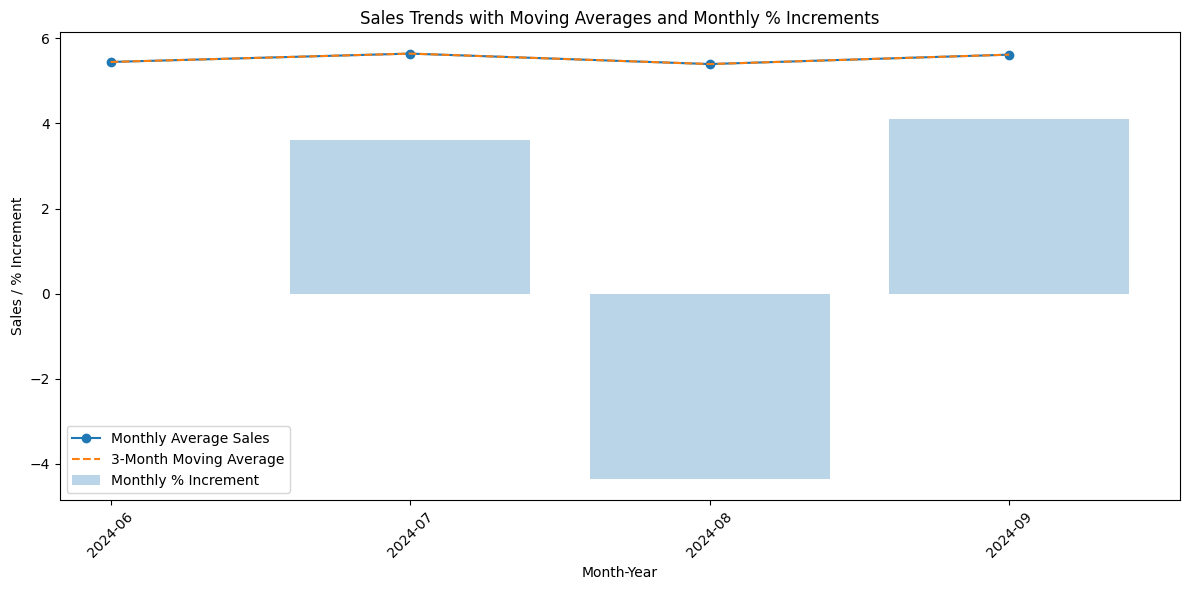

In [577]:
import matplotlib.pyplot as plt

# Calculate 3-month moving average for 'avg_sales'
monthly_stats['moving_avg'] = monthly_stats['avg_sales'].rolling(window=1, min_periods=1).mean()

# Plot the average sales, moving average, and percentage increments
plt.figure(figsize=(12, 6))

# Plot the average sales
plt.plot(monthly_stats['YEAR_MONTH'].astype(str), monthly_stats['avg_sales'], label='Monthly Average Sales', marker='o')

# Plot the 3-month moving average
plt.plot(monthly_stats['YEAR_MONTH'].astype(str), monthly_stats['moving_avg'], label='3-Month Moving Average', linestyle='--')

# Plot the percentage increment
plt.bar(monthly_stats['YEAR_MONTH'].astype(str), monthly_stats['pct_increment'], alpha=0.3, label='Monthly % Increment')

# Add labels and title
plt.xlabel('Month-Year')
plt.ylabel('Sales / % Increment')
plt.title('Sales Trends with Moving Averages and Monthly % Increments')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [578]:
merged_df.dtypes

Unnamed: 0                                  int64
RECEIPT_ID                                 object
PURCHASE_DATE                      datetime64[ns]
SCAN_DATE                                  object
STORE_NAME                                 object
USER_ID                                    object
BARCODE                                   float64
FINAL_QUANTITY                            float64
FINAL_SALE                                float64
FINAL_QUANTITY_NUMERIC                    float64
FINAL_SALE_NUMERIC                        float64
PURCHASE_DATE_CT                   datetime64[ns]
row_num                                     int64
ID                                         object
CREATED_DATE                       datetime64[ns]
BIRTH_DATE                         datetime64[ns]
STATE                                      object
LANGUAGE                                   object
GENDER                                     object
BIRTH_DATE_FIX                             object


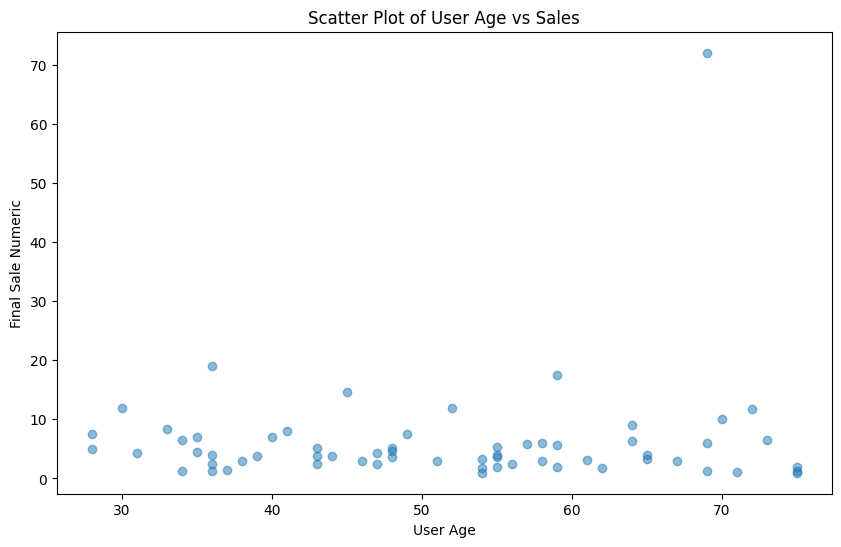

In [582]:
import matplotlib.pyplot as plt

# Scatter plot of User Age vs Final Sale Numeric
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['AGE_WHEN_PURCHASE'], merged_df['FINAL_SALE_NUMERIC'], alpha=0.5, marker='o')
plt.xlabel('User Age')
plt.ylabel('Final Sale Numeric')
plt.title('Scatter Plot of User Age vs Sales')
plt.show()


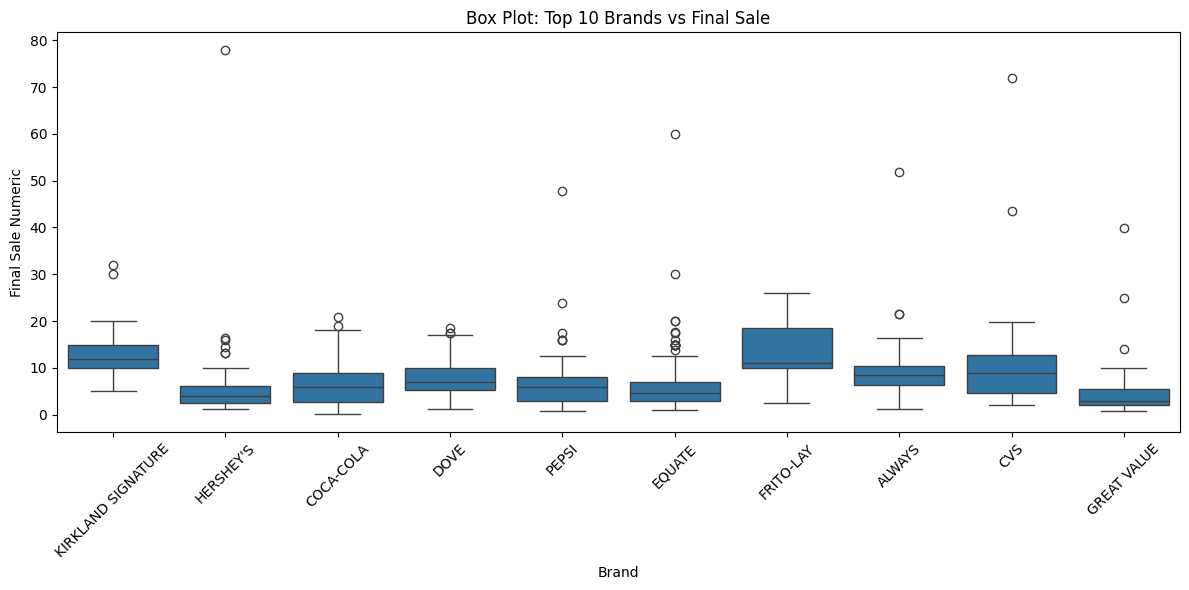

In [584]:
import seaborn as sns
import matplotlib.pyplot as plt

# Now sales by brand

# Step 1: Group by 'BRAND' and sum 'FINAL_SALE_NUMERIC'
brand_sales = merged_df.groupby('BRAND')['FINAL_SALE_NUMERIC'].sum().reset_index()

# Step 2: Sort brands by total sales and get the top 10 brands
top_brands = brand_sales.sort_values(by='FINAL_SALE_NUMERIC', ascending=False).head(10)

# Step 3: Filter the original dataframe for only the top brands
top_brands_data = merged_df[merged_df['BRAND'].isin(top_brands['BRAND'])]

# Step 4: Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='BRAND', y='FINAL_SALE_NUMERIC', data=top_brands_data)

# Add title and labels
plt.title('Box Plot: Top 10 Brands vs Final Sale')
plt.xlabel('Brand')
plt.ylabel('Final Sale Numeric')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [579]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'merged_df' has 'BRAND', 'FINAL_SALE_NUMERIC', and 'PURCHASE_DATE_CT' columns

# Step 1: Ensure that 'PURCHASE_DATE_CT' is in datetime format
merged_df['PURCHASE_DATE_CT'] = pd.to_datetime(merged_df['PURCHASE_DATE_CT'], errors='coerce')

# Step 2: Extract the year and month for grouping
merged_df['Year-Month'] = merged_df['PURCHASE_DATE_CT'].dt.to_period('M')  # 'M' for monthly period

# Step 3: Group by 'BRAND' and 'Year-Month' and calculate the sum and standard error of the sales
brand_sales_per_month = merged_df.groupby(['BRAND', 'Year-Month'])['FINAL_SALE_NUMERIC'].agg(
    ['mean', 'sem']  # 'sem' is standard error of the mean
).reset_index()

# Step 4: Plot the sales trend with CI for each brand
plt.figure(figsize=(14, 8))

for brand in brand_sales_per_month['BRAND'].unique():
    brand_data = brand_sales_per_month[brand_sales_per_month['BRAND'] == brand]

    # Mean and CI
    mean_sales = brand_data['mean']
    ci_upper = mean_sales + 1.96 * brand_data['sem']  # 95% CI upper bound
    ci_lower = mean_sales - 1.96 * brand_data['sem']  # 95% CI lower bound

    # Plot the mean sales
    plt.plot(brand_data['Year-Month'].astype(str), mean_sales, label=brand)

    # Plot the confidence interval (shaded area)
    plt.fill_between(brand_data['Year-Month'].astype(str), ci_lower, ci_upper, alpha=0.3)

# Customize the plot
plt.title('Sales Trend Over Time by Brand with Confidence Intervals')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Unnamed: 0                  int64
RECEIPT_ID                 object
PURCHASE_DATE              object
SCAN_DATE                  object
STORE_NAME                 object
USER_ID                    object
BARCODE                   float64
FINAL_QUANTITY            float64
FINAL_SALE                float64
FINAL_QUANTITY_NUMERIC    float64
FINAL_SALE_NUMERIC        float64
PURCHASE_DATE_CT           object
row_num                     int64
CATEGORY_1                 object
CATEGORY_2                 object
CATEGORY_3                 object
CATEGORY_4                 object
MANUFACTURER               object
BRAND                      object
ID                         object
CREATED_DATE               object
BIRTH_DATE                 object
STATE                      object
LANGUAGE                   object
GENDER                     object
BIRTH_DATE_FIX             object
CREATED_DATE_CT            object
dtype: object

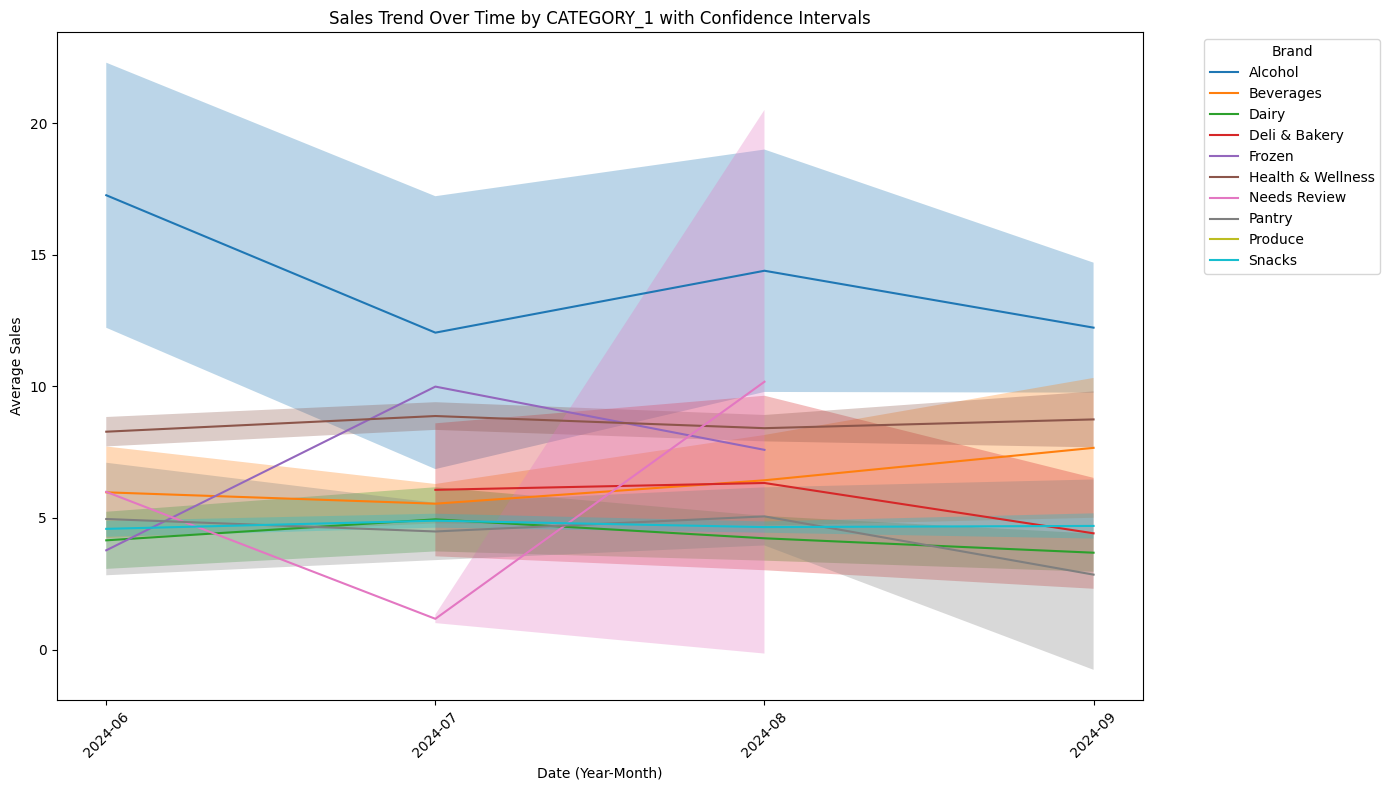

In [588]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Ensure that 'PURCHASE_DATE_CT' is in datetime format
merged_df['PURCHASE_DATE_CT'] = pd.to_datetime(merged_df['PURCHASE_DATE_CT'], errors='coerce')

# Step 2: Extract the year and month for grouping
merged_df['Year-Month'] = merged_df['PURCHASE_DATE_CT'].dt.to_period('M')  # 'M' for monthly period

# Step 3: Group by 'BRAND' and 'Year-Month' and calculate the sum and standard error of the sales
brand_sales_per_month = merged_df.groupby(['CATEGORY_1', 'Year-Month'])['FINAL_SALE_NUMERIC'].agg(
    ['mean', 'sem']  # 'sem' is standard error of the mean
).reset_index()

# Step 4: Plot the sales trend with CI for each brand
plt.figure(figsize=(14, 8))

for brand in brand_sales_per_month['CATEGORY_1'].unique():
    brand_data = brand_sales_per_month[brand_sales_per_month['CATEGORY_1'] == brand]

    # Mean and CI
    mean_sales = brand_data['mean']
    ci_upper = mean_sales + 1.96 * brand_data['sem']  # 95% CI upper bound
    ci_lower = mean_sales - 1.96 * brand_data['sem']  # 95% CI lower bound

    # Plot the mean sales
    plt.plot(brand_data['Year-Month'].astype(str), mean_sales, label=brand)

    # Plot the confidence interval (shaded area)
    plt.fill_between(brand_data['Year-Month'].astype(str), ci_lower, ci_upper, alpha=0.3)

# Customize the plot
plt.title('Sales Trend Over Time by CATEGORY_1 with Confidence Intervals')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


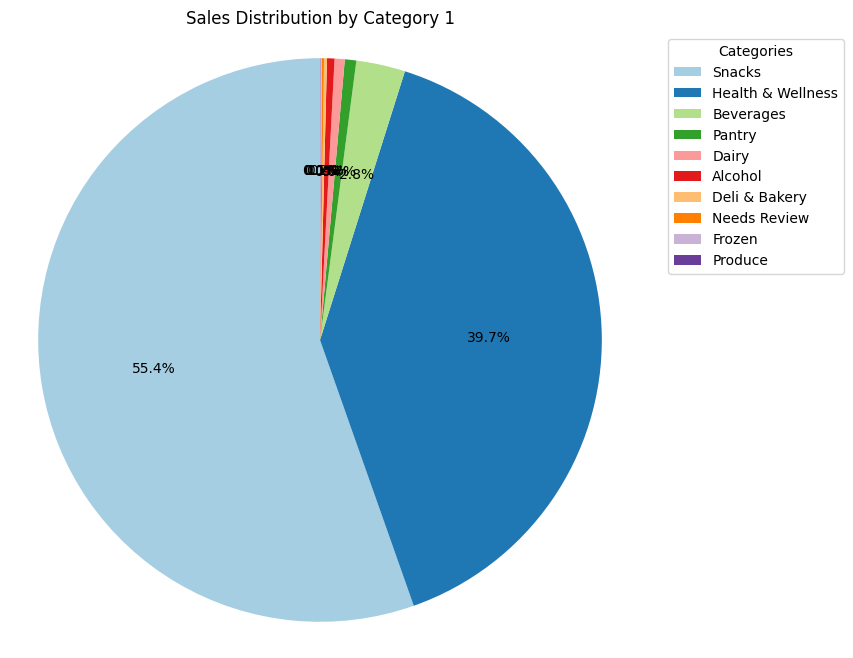

In [591]:
import matplotlib.pyplot as plt

# Step 1: Group by 'CATEGORY_1' and count the number of occurrences (or sum if you want the total sales)
category_counts = merged_df['CATEGORY_1'].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Category 1')
plt.legend(category_counts.index, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')
plt.show()



In [599]:
# Filter rows where 'CATEGORY_1' contains 'Alcohol' and handle NaN values
# Drop NaN values in 'CATEGORY_1' and then filter by string match
filtered_df = merged_df.dropna(subset=['CATEGORY_1'])
filtered_df = filtered_df[filtered_df['CATEGORY_1'].str.contains('Alco')]

In [604]:
filtered_df

,Unnamed: 0,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,...,AGE_WHEN_CREATION,TIME_AS_USER_WHEN_PURCHASING,TIME_AS_USER_WHEN_PURCHASING_MO,AGE_WHEN_PURCHASE,DATE,YEAR,SALES_MOVING_AVG,SALES_PCT_INCREMENT,YEAR_MONTH,Year-Month
1268,1268,83577b41-ba8a-469a-8692-587e4d60bdfb,2024-09-05,2024-09-07 18:53:17.320 Z,WALMART,5bffd0aca7b004132868f3ab,1.834115e+10,1.0,10.97,1.0,...,NaN,NaN,NaN,NaN,2024-09-05,2024,5.710000,821.848739,2024-09,2024-09
6009,6009,dee29d78-cb5e-4d5f-8e9e-ecd4348a88f2,2024-07-17,2024-07-18 19:26:31.939 Z,ALBERTSONS,5dba06b3abb02811aaa11a90,7.199010e+10,1.0,19.98,1.0,...,NaN,NaN,NaN,NaN,2024-07-17,2024,9.466667,718.852459,2024-07,2024-07
6010,6010,d866fc41-73f6-4380-b739-0f6191791a7b,2024-08-31,2024-08-31 15:21:43.477 Z,STATER BROS,61a44787db54774a0e032808,7.199030e+10,1.0,18.99,1.0,...,NaN,NaN,NaN,NaN,2024-08-31,2024,13.803333,-4.954955,2024-08,2024-08
6011,6011,8eaf02d9-e8d9-4ac3-9384-28021f5fc65a,2024-06-19,2024-06-20 07:52:57.315 Z,BOOTLEGGERS LIQUOR OUTLET,64efcad5c65c76a8489e35fd,7.199030e+10,1.0,24.99,1.0,...,NaN,NaN,NaN,NaN,2024-06-19,2024,21.320000,31.595577,2024-06,2024-06
6012,6012,76dba960-c97a-4f2e-968f-bef8436f00b6,2024-07-30,2024-07-31 11:40:26.656 Z,WALMART,639e9e47b5f32149b9d343f6,7.199030e+10,1.0,23.73,1.0,...,NaN,NaN,NaN,NaN,2024-07-30,2024,22.570000,-5.042017,2024-07,2024-07
6013,6013,3a04c056-484f-4065-b08a-c53db44a5700,2024-08-11,2024-08-13 17:03:56.953 Z,TARGET,6118402d2d54841c909b3f78,7.199030e+10,1.0,10.00,1.0,...,NaN,NaN,NaN,NaN,2024-08-11,2024,19.573333,-57.859250,2024-08,2024-08
6014,6014,0dad6c7e-e50f-42bc-8deb-8ad12df3f7e6,2024-06-15,2024-06-17 08:35:26.367 Z,WALMART,5d191765c8b1ba28e74e8463,7.199030e+10,1.0,17.48,1.0,...,54.0,4.0,59.0,59.0,2024-06-15,2024,17.070000,74.800000,2024-06,2024-06
6015,6015,8d644e94-8334-4778-85fc-9204909d706f,2024-06-24,2024-06-27 14:20:34.758 Z,JEWEL OSCO,6422d8d66c38ddd121a3f193,7.199030e+10,2.0,33.98,2.0,...,NaN,NaN,NaN,NaN,2024-06-24,2024,20.486667,94.393593,2024-06,2024-06
6016,6016,1ae7dabc-32ac-46ab-8087-14487393a75f,2024-06-15,2024-06-20 14:43:16.583 Z,STATER BROS,606612eee6206c2dd6069177,7.199030e+10,1.0,23.99,1.0,...,NaN,NaN,NaN,NaN,2024-06-15,2024,25.150000,-29.399647,2024-06,2024-06
6017,6017,7e044809-c9c3-4026-abd6-4e250c7c23ff,2024-06-24,2024-06-30 15:02:38.236 Z,LONGS DRUGS,60aae7fc44b0734609430fca,7.199030e+10,1.0,13.99,1.0,...,NaN,NaN,NaN,NaN,2024-06-24,2024,23.986667,-41.684035,2024-06,2024-06


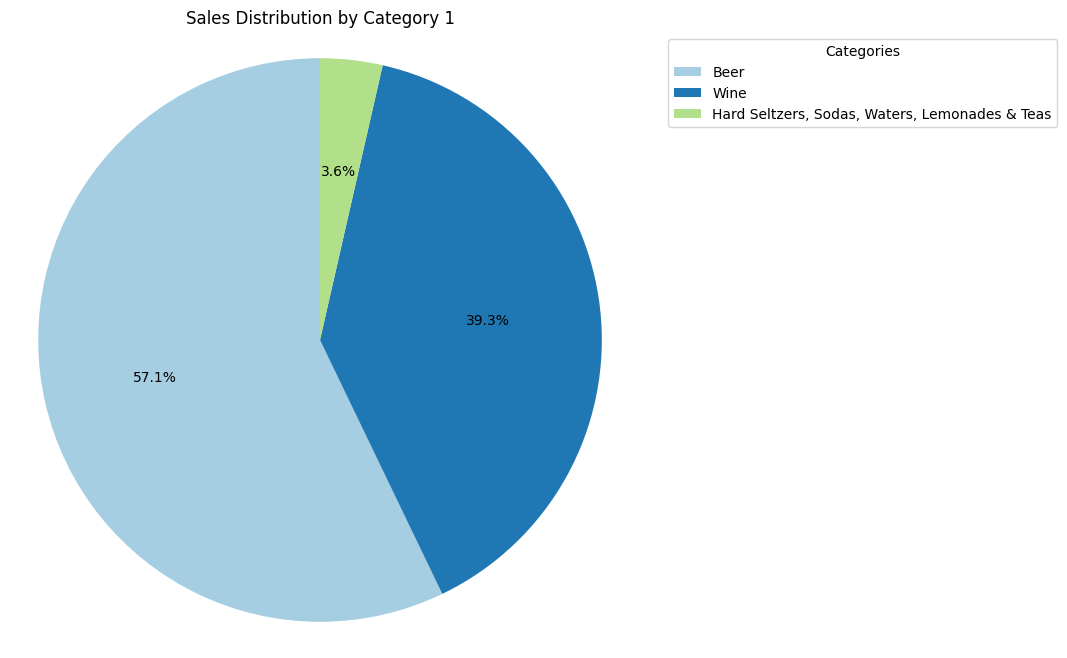

In [600]:
#alcohol categories
category_counts = filtered_df['CATEGORY_2'].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Category 1')
plt.legend(category_counts.index, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')
plt.show()

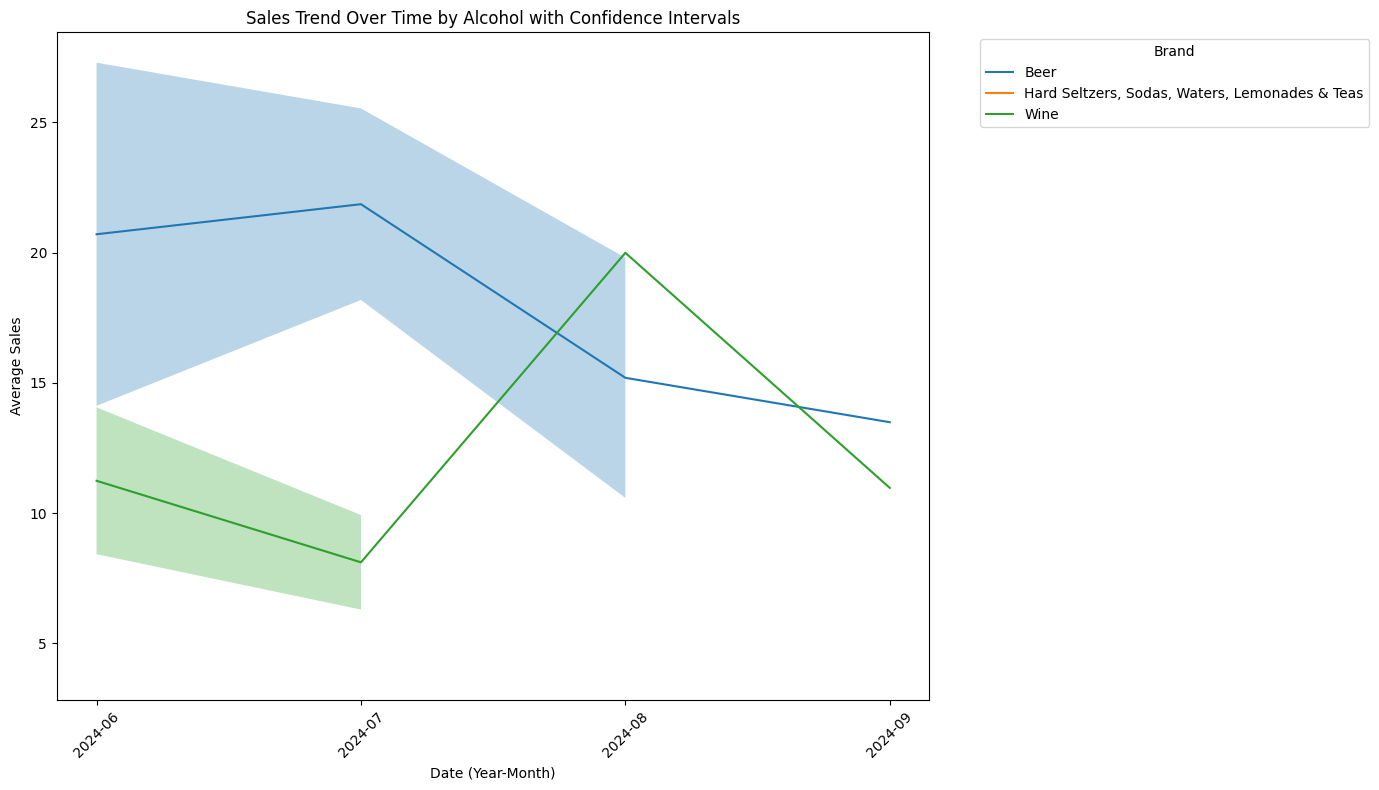

In [601]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Ensure that 'PURCHASE_DATE_CT' is in datetime format
filtered_df['PURCHASE_DATE_CT'] = pd.to_datetime(filtered_df['PURCHASE_DATE_CT'], errors='coerce')

# Step 2: Extract the year and month for grouping
filtered_df['Year-Month'] = filtered_df['PURCHASE_DATE_CT'].dt.to_period('M')  # 'M' for monthly period

# Step 3: Group by 'BRAND' and 'Year-Month' and calculate the sum and standard error of the sales
brand_sales_per_month = filtered_df.groupby(['CATEGORY_2', 'Year-Month'])['FINAL_SALE_NUMERIC'].agg(
    ['mean', 'sem']  # 'sem' is standard error of the mean
).reset_index()

# Step 4: Plot the sales trend with CI for each brand
plt.figure(figsize=(14, 8))

for brand in brand_sales_per_month['CATEGORY_2'].unique():
    brand_data = brand_sales_per_month[brand_sales_per_month['CATEGORY_2'] == brand]

    # Mean and CI
    mean_sales = brand_data['mean']
    ci_upper = mean_sales + 1.96 * brand_data['sem']  # 95% CI upper bound
    ci_lower = mean_sales - 1.96 * brand_data['sem']  # 95% CI lower bound

    # Plot the mean sales
    plt.plot(brand_data['Year-Month'].astype(str), mean_sales, label=brand)

    # Plot the confidence interval (shaded area)
    plt.fill_between(brand_data['Year-Month'].astype(str), ci_lower, ci_upper, alpha=0.3)

# Customize the plot
plt.title('Sales Trend Over Time by Alcohol with Confidence Intervals')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


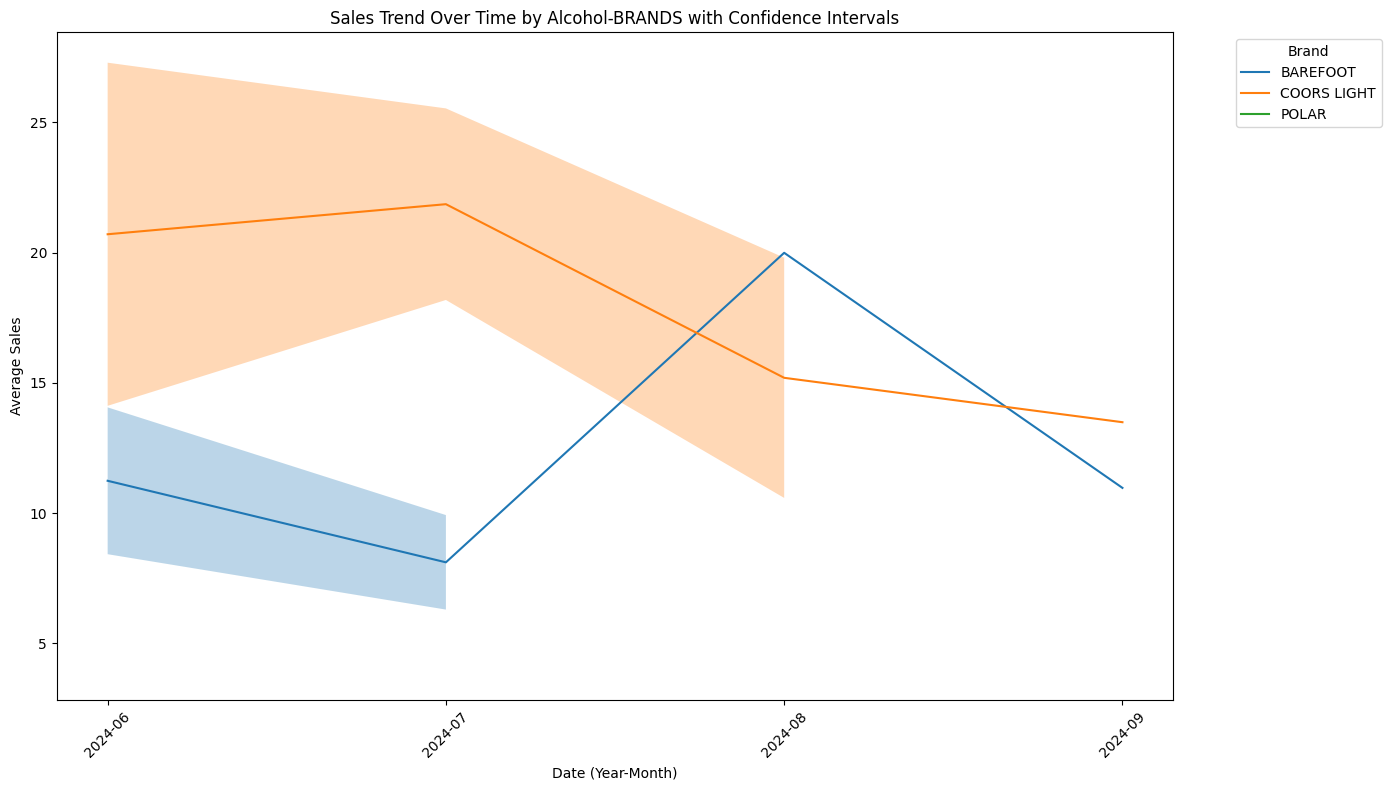

In [606]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filtered_df1 = filtered_df#[filtered_df['CATEGORY_2'].str.contains('Bee')]
# Step 1: Ensure that 'PURCHASE_DATE_CT' is in datetime format
filtered_df1['PURCHASE_DATE_CT'] = pd.to_datetime(filtered_df1['PURCHASE_DATE_CT'], errors='coerce')

# Step 2: Extract the year and month for grouping
filtered_df1['Year-Month'] = filtered_df1['PURCHASE_DATE_CT'].dt.to_period('M')  # 'M' for monthly period

# Step 3: Group by 'BRAND' and 'Year-Month' and calculate the sum and standard error of the sales
brand_sales_per_month = filtered_df1.groupby(['BRAND', 'Year-Month'])['FINAL_SALE_NUMERIC'].agg(
    ['mean', 'sem']  # 'sem' is standard error of the mean
).reset_index()

# Step 4: Plot the sales trend with CI for each brand
plt.figure(figsize=(14, 8))

for brand in brand_sales_per_month['BRAND'].unique():
    brand_data = brand_sales_per_month[brand_sales_per_month['BRAND'] == brand]

    # Mean and CI
    mean_sales = brand_data['mean']
    ci_upper = mean_sales + 1.96 * brand_data['sem']  # 95% CI upper bound
    ci_lower = mean_sales - 1.96 * brand_data['sem']  # 95% CI lower bound

    # Plot the mean sales
    plt.plot(brand_data['Year-Month'].astype(str), mean_sales, label=brand)

    # Plot the confidence interval (shaded area)
    plt.fill_between(brand_data['Year-Month'].astype(str), ci_lower, ci_upper, alpha=0.3)

# Customize the plot
plt.title('Sales Trend Over Time by Alcohol-BRANDS with Confidence Intervals')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()